In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import ML package

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster


In [2]:
sushiswap = pd.read_csv('polygon_sushiswap_wallet_activities.csv') #this is one week data of swap transaction
sushiswap.head()
#avg_hour_freq = average hourly frequency = average transaction per hours

,from_address,no_day_active,total_tx,avg_hour_act_per_day,avg_hour_freq
0,0x5fb5d087a67d412350060c848b826b9fb0fe92ba,9,78,4.333333,2.000000
1,0xd60b95f4b73a2ff115d5f9efe6d207493cb1ce3b,4,14,2.250000,1.250000
2,0xde68739b31618b153d2ece4d8b04e121aba20665,1,2,1.000000,2.000000
3,0xfa81b223c8d37c2f3df1e46b5d7fe9bcae1c24cd,1,1,1.000000,1.000000
4,0x05a0726f7b585a1a060a6df44de62b2c10728f99,9,395,10.111111,3.111111


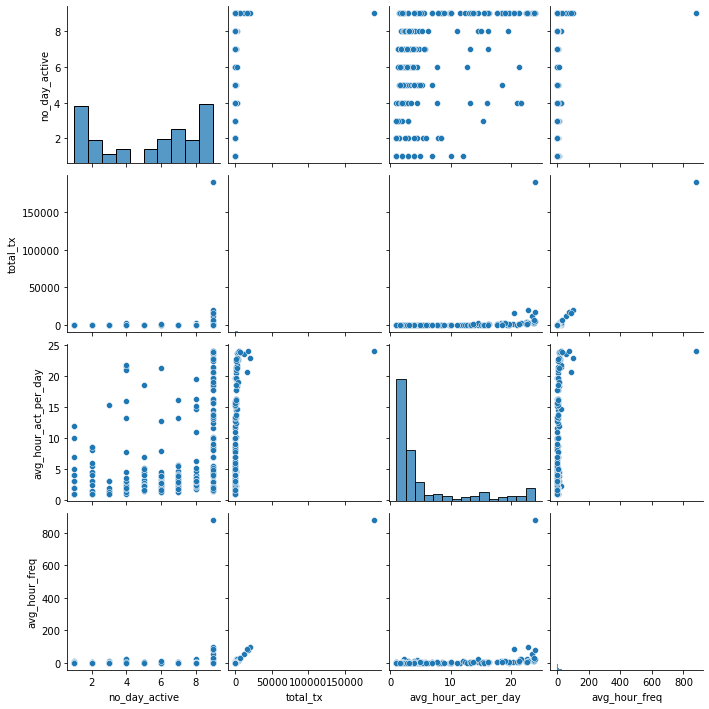

In [3]:
sns.pairplot(sushiswap)

In [4]:
sushiswap.shape

(328, 5)

In [5]:
dataset = sushiswap.drop(columns = ['from_address'])
wallet_address = sushiswap[['from_address']]

### StandardScaler

In [6]:
SS_scaler = preprocessing.StandardScaler()
dataset1_standardized = SS_scaler.fit_transform(dataset)
dataset1_standardized = pd.DataFrame(dataset1_standardized)
dataset1_standardized.head()

,0,1,2,3
0,1.208409,-0.094666,-0.224183,-0.094392
1,-0.412025,-0.100687,-0.534197,-0.109641
2,-1.384285,-0.101816,-0.720206,-0.094392
3,-1.384285,-0.101911,-0.720206,-0.114725
4,1.208409,-0.064839,0.635590,-0.071800


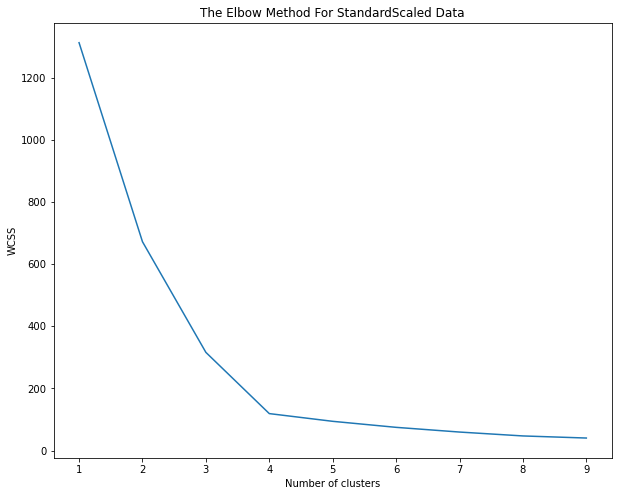

In [7]:
# find the appropriate cluster number for Standardized dataset
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42, n_init = 10)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method For StandardScaled Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #Within-cluster sums of squares
plt.show()

### MinMax Scaler

In [ ]:
#Min-Max Scaler
MM_scaler = preprocessing.MinMaxScaler()
dataset1_minmaxscaled = MM_scaler.fit_transform(dataset)
dataset1_minmaxscaled = pd.DataFrame(dataset1_minmaxscaled)
dataset1_minmaxscaled.head()

In [ ]:
# find the appropriate cluster number for MinMaxScaled dataset
##plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42, n_init = 10)
    kmeans.fit(dataset1_minmaxscaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method For StandardScaled Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #Within-cluster sums of squares
plt.show()

In [ ]:
# Fitting K-Means to the Minmax-scaled dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 12)
y_kmeans = kmeans.fit_predict(dataset1_minmaxscaled)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1,columns = ['cluster_k'])
# Adding cluster to the Dataset1
dataset1_minmaxscaled['cluster'] = y_kmeans1
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1_minmaxscaled.groupby('cluster').mean(),1))
kmeans_mean_cluster

In [ ]:
#plt.figure(figsize=(10, 8))
sns.scatterplot(data = dataset1_minmaxscaled, x = dataset1_minmaxscaled.iloc[:,0], y = dataset1_minmaxscaled.iloc[:,1], hue=y_kmeans1, style = y_kmeans1, palette="tab10")
plt.legend(loc="upper left")

plt.yscale('log')
# plot points with cluster dependent colors
plt.title('MinMaxScaled Data - Hierarchical Clutering')
plt.show()

# Hierarchical clustering

In [ ]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
dataset2 = dataset1_minmaxscaled

# some setting for this notebook to actually show the graphs inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(dataset2,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [ ]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
#from scipy.cluster.hierarchy import fcluster
k=3 #number of cluster
k_cluster = fcluster(H_cluster, k, criterion='maxclust')
k_cluster[0:1000:,] #Sample for 100 data points
cluster_2 = pd.DataFrame(k_cluster, columns = ['cluster_h'])
#plt.figure(figsize=(10, 8))
sns.scatterplot(data = dataset2, x = dataset2.iloc[:,0], y = dataset2.iloc[:,1], hue=k_cluster, style = k_cluster, palette="tab10")
plt.legend(loc="upper left")

plt.yscale('log')
# plot points with cluster dependent colors
plt.title('MinMaxScaled Data - Hierarchical Clutering')
plt.show()

In [ ]:
result_h = pd.concat([sushiswap,cluster_2],axis=1)

In [ ]:
#plt.figure(figsize=(10, 8))
sns.scatterplot(data = result_h, x ='no_day_active', y = 'avg_hour_act_per_day', hue='cluster_h', style = 'cluster_h', palette="tab10")
plt.legend(loc="upper left")
#plt.yscale('log')
# plot points with cluster dependent colors
plt.title('Cluster result')
plt.show()

In [ ]:
result.groupby('cluster_h')['no_day_active'].describe()

In [ ]:
result.groupby('cluster_h')['total_tx'].describe()

In [ ]:
result.groupby('cluster_h')['avg_hour_act_per_day'].describe()

In [ ]:
result.groupby('cluster_h')['avg_hour_freq'].describe()

In [ ]:
bot_list = ['0x84e5bc3df0df0f543648f250443c6f4077218312',
                                '0xa81ce04168e41a47f68a975d67a00fbef729af9b',
                                '0xd0b5335be74480f9303b88f5b55acd676598882a',
                                '0xea8a67728e817eb63b3b794aa3b3a89e8cba475b']
result_h[result_h['from_address'].isin(bot_list)]

In [ ]:
result_h[result_h['cluster_h']==2]

In [ ]:
result_h[result_h['cluster_h']==3]

In [ ]:
result_h[result_h['cluster_h']==1]

In [ ]:
# 2 = bot
# 3 = smart contract
# 1 = still contract

## Using StandardScaler

In [10]:
# Fitting K-Means to the Minmax-scaled dataset
kmeans_SS = KMeans(n_clusters = 4, init = 'k-means++', random_state = 12)
y_kmeans_SS = kmeans_SS.fit_predict(dataset1_standardized)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1_SS=y_kmeans_SS
y_kmeans1_SS=y_kmeans_SS+1
# New Dataframe called cluster
cluster_SS = pd.DataFrame(y_kmeans1_SS,columns = ['cluster_k'])
# Adding cluster to the Dataset1
dataset1_standardized['cluster'] = y_kmeans1_SS
#Mean of clusters
kmeans_mean_cluster_SS = pd.DataFrame(round(dataset1_standardized.groupby('cluster').mean(),1))
kmeans_mean_cluster_SS

/Users/clara/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,2,3
cluster,,,,
1,-0.8,-0.1,-0.6,-0.1
2,0.7,0.1,1.6,0.1
3,1.2,17.8,2.7,17.7
4,0.8,-0.1,-0.4,-0.1


In [19]:
dataset1_standardized['cluster'].value_counts()

1    162
4     86
2     79
3      1
Name: cluster, dtype: int64

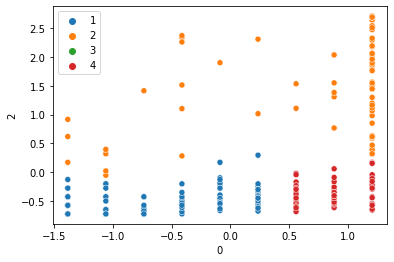

In [18]:
sns.scatterplot(data = dataset1_standardized, x =dataset1_standardized.iloc[:,0], y =dataset1_standardized.iloc[:,2], hue = y_kmeans1_SS,palette="tab10")
#plt.xscale('log')
plt.show()

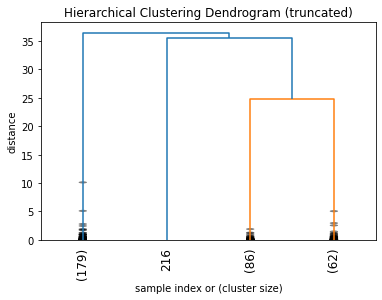

In [23]:
dataset2 = dataset1_standardized

# some setting for this notebook to actually show the graphs inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(dataset2,'ward') #ward mininize variance
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

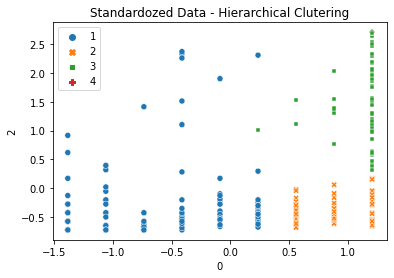

In [25]:
k=4 #number of cluster
k_cluster_SS = fcluster(H_cluster, k, criterion='maxclust')
#k_cluster[0:1000:,] #Sample for 100 data points
cluster_SS_2 = pd.DataFrame(k_cluster_SS, columns = ['cluster_h'])
#plt.figure(figsize=(10, 8))
sns.scatterplot(data = dataset2, x = dataset2.iloc[:,0], y = dataset2.iloc[:,2], hue=k_cluster_SS, style = k_cluster_SS, palette="tab10")
plt.legend(loc="upper left")

#plt.yscale('log')
# plot points with cluster dependent colors
plt.title('Standardozed Data - Hierarchical Clutering')
plt.show()

In [27]:
SS_wallet_cluster = pd.concat([sushiswap,cluster_SS_2,cluster_SS],axis=1)
SS_wallet_cluster.head()

,from_address,no_day_active,total_tx,avg_hour_act_per_day,avg_hour_freq,cluster_h,cluster_k
0,0x5fb5d087a67d412350060c848b826b9fb0fe92ba,9,78,4.333333,2.000000,2,4
1,0xd60b95f4b73a2ff115d5f9efe6d207493cb1ce3b,4,14,2.250000,1.250000,1,1
2,0xde68739b31618b153d2ece4d8b04e121aba20665,1,2,1.000000,2.000000,1,1
3,0xfa81b223c8d37c2f3df1e46b5d7fe9bcae1c24cd,1,1,1.000000,1.000000,1,1
4,0x05a0726f7b585a1a060a6df44de62b2c10728f99,9,395,10.111111,3.111111,3,2


In [28]:
SS_wallet_cluster['cluster_h'].value_counts()

1    179
2     86
3     62
4      1
Name: cluster_h, dtype: int64

In [29]:
SS_wallet_cluster['cluster_k'].value_counts()

1    162
4     86
2     79
3      1
Name: cluster_k, dtype: int64

In [30]:
SS_wallet_cluster[SS_wallet_cluster['cluster_k']==3] #Sushiswap Rounter

,from_address,no_day_active,total_tx,avg_hour_act_per_day,avg_hour_freq,cluster_h,cluster_k
216,0x1b02da8cb0d097eb8d57a175b88c7d8b47997506,9,189829,24.0,878.444444,4,3


In [32]:
SS_wallet_cluster[SS_wallet_cluster['cluster_k']==2]

,from_address,no_day_active,total_tx,avg_hour_act_per_day,avg_hour_freq,cluster_h,cluster_k
4,0x05a0726f7b585a1a060a6df44de62b2c10728f99,9,395,10.111111,3.111111,3,2
15,0xd89266ecd972ab5730374d6d4794ab52d2607a4f,9,2582,18.333333,14.666667,3,2
28,0xbc20ef8c9d8b67ad2c4fba5129f7c0943878ac6c,9,171,9.777778,1.555556,3,2
32,0xa9a0c4c86a9d9fe97d2b5d3a1cc194caef51ece1,9,640,15.555556,4.000000,3,2
33,0x27218d498ad7953afd702a1923e4a09ae96a6a9e,9,180,19.666667,1.000000,3,2
...,...,...,...,...,...,...,...
306,0xe0279bb70978309cfc050605e1f93ec1ceb9254c,2,36,6.000000,2.500000,1,2
309,0x0e147fa6f6a697d46cdd8cbe95b2d34d9493bb11,9,890,13.666667,6.000000,3,2
310,0x22a895db1934daf1c12bbcd67c0d7b6647c1d9e5,9,1198,22.666667,5.333333,3,2
311,0xe7d4800d36e63159a706c32ad93fcd02fb07a24f,9,6950,23.888889,31.777778,3,2
